In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
with open('huck_finn.txt', 'r') as file:
    huck_finn_text = file.read()
    huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

In [3]:
# Create a new datascience Table
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees ba ...
"III. WELL, I got a good going-over in the morning from ..."
"IV. WELL, three or four months run along, and it was we ..."
V. I had shut the door to. Then I turned around and th ...
"VI. WELL, pretty soon the old man was up and around aga ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and l ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the ...
X. AFTER breakfast I wanted to talk about the dead man ...


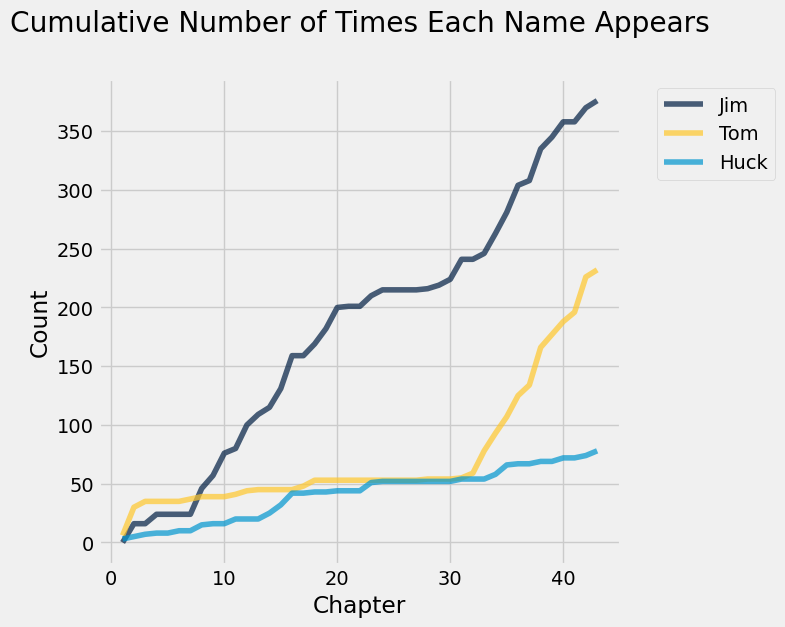

In [4]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom', np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck', np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)

plots.title('Cumulative Number of Times Each Name Appears', y=1.08)
plots.ylabel('Count');

In [5]:
with open('little_women.txt', 'r') as file:
    little_women_text = file.read()
    little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [ ]:
# little_women_chapters

In [7]:
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas wit ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" crie ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfe ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the mo ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of ..."


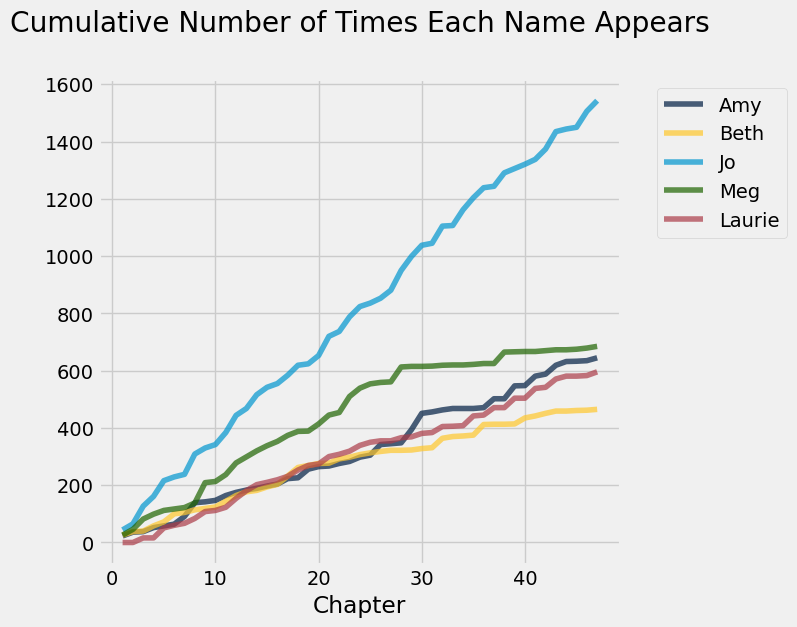

In [8]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth', np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo', np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg', np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'Laurie', np.cumsum(np.char.count(little_women_chapters, 'Laurie'))
    ])

# Plot the cumulative counts.
counts.with_column('Chapter', np.arange(1, 48, 1)).plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

In [9]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])

chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7088,66
12113,117
8612,72
6892,84
8269,91
14672,125
13349,127
22483,249
8153,71
7109,70


In [10]:
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

chars_periods_little_women

Little Women Chapter Length,Number of Periods
21952,189
22384,188
20815,231
25689,195
23657,255
14736,140
14549,131
22679,214
34054,337
19657,185


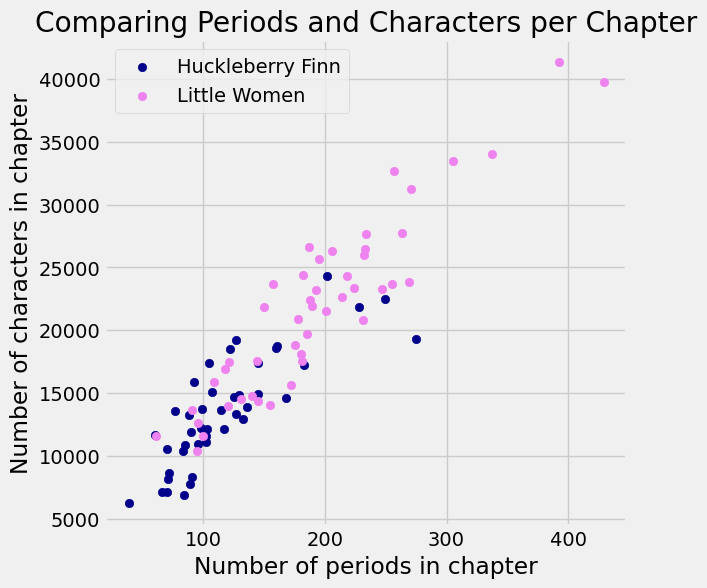

In [11]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='darkblue',
             label='Huckleberry Finn')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='violet',
             label='Little Women')
plots.legend()
plots.title('Comparing Periods and Characters per Chapter')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');